## Forest fires in the northeast region of Portugal
Data set: https://archive.ics.uci.edu/ml/datasets/forest+fires

Zadaniem jest klasyfikacja względem określonych danych np. temperatury lub np. obszaru.

Wersja z mniejszą ilością atrybutów

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from sklearn import tree

## Reading the data
5. FFMC - Fine Fuel Moisture Code: 18.7 to 96.20<br>
6. DMC - Duff Moisture Code: 1.1 to 291.3<br>
7. DC - Drought Code: 7.9 to 860.6<br>
8. ISI - Initial Spread Index: 0.0 to 56.10<br>
9. temp - temperature in Celsius degrees: 2.2 to 33.30<br>

In [2]:
path = 'forestfires.csv'
names = ['FFMC', 'DMC', 'DC', 'ISI', 'temp']
dataset = pd.read_csv(path, usecols=['FFMC', 'DMC', 'DC', 'ISI', 'temp'])
dataset.head()


,FFMC,DMC,DC,ISI,temp
0,86.2,26.2,94.3,5.1,8.2
1,90.6,35.4,669.1,6.7,18.0
2,90.6,43.7,686.9,6.7,14.6
3,91.7,33.3,77.5,9.0,8.3
4,89.3,51.3,102.2,9.6,11.4


## Preprocessing
x = attributes, y = labels

In [3]:
cols = list(dataset.columns.values)
x = dataset.iloc[:, :4].values
yf = dataset.iloc[:, -1].values
y = yf.round(0).astype(int) # converting floats to int

## Dividing a Dataset into Training and Validation Samples

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 82)

## Feature scaling

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Decision Tree

In [6]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth = 2, random_state = 0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

## Prediction

In [7]:
y_pred = classifier.predict(x_test)
print(y_pred)


[12 12 20 12 20  5 23 20 23  5 23 20  5 12 12 12  5 20 20 20 20 23 12 20
 20 20 20 20 23 20 20  5 20 20 20 23 12 23 20 20 20 20 20 20 20 12 20 12
 20 20 12 20 23 23 23 20 23 20 20 23 20 20 12 20 20 20 23  5 20  5 23 12
 23 12 23 20 12 20 20 20 20 20 23 20 20 23 12 23 20 12  5 20 20 12 20 23
 20 20 12 23 23 20 23 20]


In [8]:
score = classifier.score(x_test, y_test)
score

0.08653846153846154

## Algorithm Evaluation

In [9]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [2 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 2 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 4 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 2 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 6 0 0 2 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 2 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 7 0 0 2 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 2 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 

## Determining the depth of the tree 

In [10]:
max_depth_range = list(range(1, 6))
accuracy = []
for depth in max_depth_range:
    classifier = DecisionTreeClassifier(max_depth = depth, random_state = 0)
    classifier.fit(x_train, y_train)
    score = classifier.score(x_test, y_test)
    accuracy.append(score)

Text(0, 0.5, 'Accuracy')

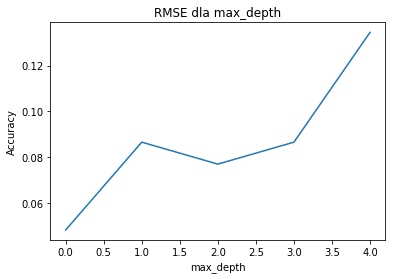

In [11]:
plt.plot(accuracy)
plt.title('RMSE dla max_depth')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

[Text(152.10865384615386, 199.32, 'X[1] <= -0.857\ngini = 0.947\nsamples = 413\nvalue = [1, 1, 12, 2, 1, 6, 5, 8, 7, 15, 8, 17, 19\n18, 29, 29, 35, 34, 31, 28, 24, 25, 11, 12, 7\n12, 5, 4, 4, 2, 1]'),
 Text(72.4326923076923, 163.07999999999998, 'X[0] <= -0.885\ngini = 0.92\nsamples = 94\nvalue = [1, 1, 11, 2, 1, 5, 5, 1, 4, 12, 3, 9, 11, 5\n9, 6, 2, 1, 1, 1, 0, 0, 1, 0, 0, 2, 0, 0\n0, 0, 0]'),
 Text(35.41153846153846, 126.83999999999999, 'X[3] <= -1.235\ngini = 0.824\nsamples = 30\nvalue = [1, 1, 11, 2, 1, 3, 1, 1, 0, 2, 0, 2, 1, 0\n3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0]'),
 Text(19.315384615384616, 90.6, 'X[0] <= -0.964\ngini = 0.744\nsamples = 22\nvalue = [0, 0, 10, 2, 0, 0, 1, 0, 0, 2, 0, 2, 1, 0\n3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0]'),
 Text(12.876923076923077, 54.359999999999985, 'X[3] <= -1.469\ngini = 0.815\nsamples = 18\nvalue = [0, 0, 6, 2, 0, 0, 1, 0, 0, 2, 0, 2, 1, 0\n3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0]'),
 Text(6.438461538461539, 18.

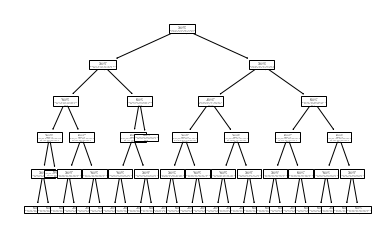

In [12]:
tree.plot_tree(classifier.fit(x_train, y_train)) 